<a href="https://colab.research.google.com/github/Elysian-C/ML_Crypto_graph/blob/main/Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U pycoingecko
!gdown 1zSuZ-QF0P3Rz_NdUpyNq8pvZ3uhF5CHA #coin_id
!gdown 1RcprFv40zoJP41rE4rj8Ehoj9J1w6Mjd #coin_exchanges
!gdown 1pLC6MhXWIIR5jqIwA5dZ1AkW89CHLy9m #coin_categories
!gdown 1Hjj_dFfp4CA5399lqHClLbAbXS0V5h8o
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
import time
import math
import requests
import json
import time
import csv
import pandas as pd
cg = CoinGeckoAPI()

Downloading...
From: https://drive.google.com/uc?id=1zSuZ-QF0P3Rz_NdUpyNq8pvZ3uhF5CHA
To: /content/coin_id.txt
100% 24.3k/24.3k [00:00<00:00, 36.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RcprFv40zoJP41rE4rj8Ehoj9J1w6Mjd
To: /content/coin_exchanges.txt
100% 111k/111k [00:00<00:00, 42.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pLC6MhXWIIR5jqIwA5dZ1AkW89CHLy9m
To: /content/coinByCategories.csv
100% 24.1k/24.1k [00:00<00:00, 34.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Hjj_dFfp4CA5399lqHClLbAbXS0V5h8o
To: /content/coinsCatVol.csv
100% 37.9k/37.9k [00:00<00:00, 37.2MB/s]


In [ ]:
url = "https://api.coingecko.com/api/v3/"
key1 = "?x_cg_demo_api_key=CG-XP8E4nK1PwsNS6DqW1DMwd4W"
key2 = "?x_cg_demo_api_key=CG-tPghnzFTBuChgcsmSX9o2hBJ"
key3 = "?x_cg_demo_api_key=CG-EXed5wDVVkkQG1tFb5Fg4GnA"

In [ ]:
def save_dict(diccionario, nombre_archivo):
    with open(nombre_archivo, 'w') as archivo:
        json.dump(diccionario, archivo)

def load_dict(file):
  with open(file, 'r') as file:
    my_d = json.load(file)
    return my_d

def load_list(file):
    lines = []
    with open(file, 'r', errors='ignore') as file:
        lines = file.readlines()
    return lines

In [ ]:
def get_coins():
  cryptos_list = cg.get_coins_list()
  cryptos = []

  for crypto in cryptos_list:
      response = requests.get(url + "coins/" + crypto + key1)
      info = response.json()
      if 'categories' in info:
          for category in ["Artificial Intelligence (AI)", "Meme", "Gaming (GameFi)", "Real World Assets (RWA)"]:
              if category in info['categories']:
                  cryptos.append(crypto['id'])
                  break
      time.sleep(2)

  with open("coin_id.txt", 'w', errors='ignore') as file:
      for crypto in cryptos:
          file.write(str(crypto) + '\n')

def get_coin_exchanges():
  dc = {}
  with open('coin_id.txt', 'r', errors='ignore') as file:
      for line in file:
          print(url + "coins/" + line.strip() + "/tickers" + key1)
          response = requests.get(url + "coins/" + line.strip() + "/tickers" + key1)
          info = response.json()
          print(info)
          name = info["name"]
          ticker_names = [ticker["market"]["name"] for ticker in info["tickers"]]
          dc[name] = ticker_names
          time.sleep(2)
  return dc

def get_coin_exchanges_ids():
    dc = {}
    with open('coin_id.txt', 'r', errors='ignore') as file:
        key_index = 0
        for line in file:
            key = keys[key_index]
            print(url + "coins/" + line.strip() + "/tickers" + key)
            response = requests.get(url + "coins/" + line.strip() + "/tickers" + key)
            info = response.json()
            print(info)
            name = line.strip()
            ticker_names = [ticker["market"]["identifier"] for ticker in info["tickers"]]
            dc[name] = ticker_names
            time.sleep(1)
            key_index = (key_index + 1) % len(keys)
    dc = {clave: list(valor) for clave, valor in dc.items()}
    return dc

def get_categories():
  dc = {
    "Artificial Intelligence (AI)": [],
    "Meme": [],
    "Gaming (GameFi)": [],
    "Real World Assets (RWA)": []
  }
  with open('coin_id.txt', 'r', errors='ignore') as file:
    for crypto in file:
      response = requests.get(url + "coins/" + crypto.strip() + key1)
      crypto_info = response.json()
      for category in dc:
          if category in crypto_info['categories']:
              dc[category].append(crypto.strip())
              print(crypto.strip() + ":" + category)
              break
      time.sleep(2)
  return dc

def invert(coin_exchanges):
  exchanges_coins = {}
  for criptomoneda, exchanges in coin_exchanges.items():
      for exchange in exchanges:
          if exchange not in exchanges_coins:
              exchanges_coins[exchange] = set()
          exchanges_coins[exchange].add(criptomoneda)
  return exchanges_coins


def get_weight(criptomoneda, exchange, informacion):
    for ticker in informacion.get('tickers', []):
        if 'coin_id' in ticker and ticker['coin_id'] == criptomoneda and ticker['market']['identifier'] == exchange:
            return ticker['volume']
    return None

def get_edges(exchanges_criptomonedas):
  edges = []
  for exchange, criptomonedas in exchanges_criptomonedas.items():
    response = requests.get(url + "exchanges/" + exchange + key1)
    time.sleep(2)
    info = response.json()
    print(exchange)
    for criptomoneda in criptomonedas:
        volumen = get_weight(criptomoneda, exchange, info)
        if volumen is not None:
            print(criptomoneda, volumen)
            edges.append((exchange, criptomoneda, volumen))
  return edges

In [ ]:
coin_exchanges = load_dict("coin_exchanges.txt")
exchanges_coins = invert(coin_exchanges)
exchanges_coin_id = load_dict("exchanges_coin_id.json") #Para obtener las aristas del grafo
#Si se poseen los archivos de la primera celda

In [ ]:
#Obtener pesos
coin_exchanges_ids = get_coin_exchanges_ids()
exchanges_coin_id = invert(coin_exchanges_ids)
save_dict(exchanges_coin_id, "exchanges_coin_id.json")#Si no se ha obtenido el archivo
edges = get_edges(exchanges_coin_id)

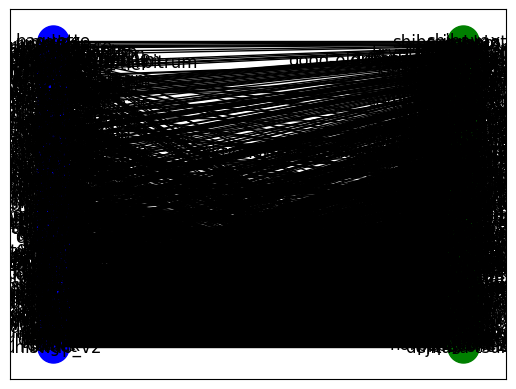

In [ ]:
def visualize_coin_exchanges(edges):
  df_categorias = pd.read_csv('coinByCategories.csv')

  G = nx.Graph()

  for exchange, criptomoneda, volumen in edges:
      categoria = df_categorias[df_categorias['coin'] == criptomoneda]['category'].values[0]
      G.add_node(criptomoneda, bipartite=categoria)
      G.add_node(exchange, bipartite='exchange')
      G.add_edge(criptomoneda, exchange, weight=volumen)

  pos = nx.bipartite_layout(G, [node for node, data in G.nodes(data=True) if data['bipartite'] == 'exchange'])
  nx.draw_networkx_nodes(G, pos, nodelist=[node for node, data in G.nodes(data=True) if data['bipartite'] == 'exchange'], node_color='blue', node_size=500)
  nx.draw_networkx_nodes(G, pos, nodelist=[node for node, data in G.nodes(data=True) if data['bipartite'] != 'exchange'], node_color='green', node_size=500)
  nx.draw_networkx_edges(G, pos)
  nx.draw_networkx_labels(G, pos)
  plt.show()
  return G
G = visualize_coin_exchanges(edges) #Visualizar en gephi

In [ ]:
nx.write_gexf(G, "exchange_coins_weighted.gexf")

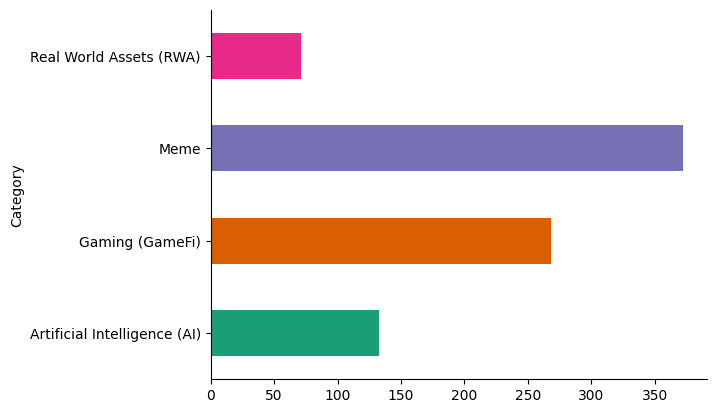

In [4]:
# @title Category
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
coinsCatVol = pd.read_csv("coinsCatVol.csv")
coinsCatVol.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
fig = px.scatter(coinsCatVol, x="Volumen",
	         size="Volumen", color="Category",
                 hover_name="Name", log_x=True, size_max=60)
fig.show()